# Bring your own Model

# Data Preprocessing on the Raw Dataset:
In this section we read the raw csv data set into a pandas data frame. We inspect the data using pandas head() function. We do data pre-processing using feature encoding, feature engineering, column renaming, dropping some columns that have no relevance to the prediction of `Avg_Hosp` cost and examining there are no missing values in the data set

In [2]:
# Read the CSV file into panda dataframe and save it to another table so we can keep a copy of the original dataset
# In our example we use the dataframe called table1 for all pre-processing, while the dataframe table
# maintains a copy of the original data

import pandas as pd
table = pd.read_csv('Medicare_Hospital_Spending_by_Claim.csv')
table1 = table.copy()
table1.head()

,Facility ID,Facility Name,State,Period,Claim Type,Avg Spending Per Episode Hospital,Avg Spending Per Episode State,Avg Spending Per Episode Nation,Percent of Spending Hospital,Percent of Spending State,Percent of Spending Nation,Start Date,End Date
0,670102,AD HOSPITAL EAST LLC,TX,1 to 3 days Prior to Index Hospital Admission,Hospice,0,1,1,0.00%,0.00%,0.00%,01/01/2018,12/31/2018
1,670102,AD HOSPITAL EAST LLC,TX,1 to 3 days Prior to Index Hospital Admission,Inpatient,0,7,7,0.00%,0.03%,0.03%,01/01/2018,12/31/2018
2,670102,AD HOSPITAL EAST LLC,TX,1 to 3 days Prior to Index Hospital Admission,Outpatient,48,140,152,0.17%,0.60%,0.70%,01/01/2018,12/31/2018
3,670102,AD HOSPITAL EAST LLC,TX,1 to 3 days Prior to Index Hospital Admission,Skilled Nursing Facility,0,3,2,0.00%,0.01%,0.01%,01/01/2018,12/31/2018
4,670102,AD HOSPITAL EAST LLC,TX,1 to 3 days Prior to Index Hospital Admission,Durable Medical Equipment,0,8,8,0.00%,0.03%,0.04%,01/01/2018,12/31/2018


In [3]:
# Encode column "State"

replace_map = {'State': {'AK': 1, 'AL': 2, 'AR': 3, 'AZ': 4, 'CA': 5, 'CO': 6, 'CT': 7, 
                         'DC': 8, 'DE': 9, 'FL': 10, 'GA': 11, 'HI': 12, 
                         'IA': 13, 'ID': 14, 'IL': 15, 'IN': 16, 'KS': 17, 
                         'KY': 18, 'LA': 19, 'MA': 20, 'ME': 21, 'MI': 22, 
                         'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 
                         'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 
                         'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 
                         'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 
                         'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 
                         'WI': 48, 'WV': 49, 'WY': 50}}
table1.replace(replace_map,inplace=True)

In [4]:
# Encode column "Period"

replace_map = {'Period': {'1 to 3 days Prior to Index Hospital Admission': 1, 
                          'During Index Hospital Admission': 2, 
                          '1 through 30 days After Discharge from Index Hospital Admission': 3, 
                          'Complete Episode': 4}}
table1.replace(replace_map,inplace=True)

In [5]:
# Encode column "Claim Type"

replace_map = {'Claim Type': {'Home Health Agency': 1, 
                              'Hospice': 2, 
                              'Inpatient': 3, 
                              'Outpatient': 4, 
                              'Skilled Nursing Facility': 5, 
                              'Durable Medical Equipment': 6, 
                              'Carrier': 7, 
                              'Total': 8}}
table1.replace(replace_map,inplace=True)

In [6]:
# Convert the column "Percent of Spending Hospital	Percent of Spending" to float, remove the percent sign and 
# divide by 100 to normalize for percentage

table1['Percent of Spending Hospital'] = table1['Percent of Spending Hospital'].str.rstrip('%').astype('float')
table1['Percent of Spending Hospital'] = table1['Percent of Spending Hospital']/100

In [7]:
# Convert the column "Percent of Spending State" to float, remove the percent sign and 
# divide by 100 to normalize for percentage

table1['Percent of Spending State'] = table1['Percent of Spending State'].str.rstrip('%').astype('float')
table1['Percent of Spending State'] = table1['Percent of Spending State']/100

In [8]:
# Convert the column "Percent of Spending Nation" to float, remove the percent sign and 
# divide by 100 to normalize for percentage

table1['Percent of Spending Nation'] = table1['Percent of Spending Nation'].str.rstrip('%').astype('float')
table1['Percent of Spending Nation'] = table1['Percent of Spending Nation']/100

In [9]:
# Drop Column "Facility Name", Facility Id related to the facility, hence facility name is not
# relevant for the model

table1.drop(['Facility Name'], axis=1, inplace = True)

In [10]:
# Move the "Avg Spending Per Episode Hospital" column to the beginning, since the
# algorithm requires the prediction column at the beginning

col_name='Avg Spending Per Episode Hospital'
first_col = table1.pop(col_name)
table1.insert(0, col_name, first_col)

In [11]:
# Convert integer values to float in the columns "Avg Spending Per Episode Hospital", 
# "Avg Spending Per Episode State" and "Avg Spending Per Episode Nation"
# Columns with integer values are interpreted as categorical values. Changing to float avoids any mis-interpretetaion

table1['Avg Spending Per Episode Hospital'] = table1['Avg Spending Per Episode Hospital'].astype('float')
table1['Avg Spending Per Episode State'] = table1['Avg Spending Per Episode State'].astype('float')
table1['Avg Spending Per Episode Nation'] = table1['Avg Spending Per Episode Nation'].astype('float')

In [12]:
# Rename long column names for costs and percentage costs on the hospital, state and nation,
# so they are easily referenced in the rest of this discussion

table1.rename(columns={'Avg Spending Per Episode Hospital':'Avg_Hosp',
                       'Avg Spending Per Episode State':'Avg_State',
                       'Avg Spending Per Episode Nation':'Avg_Nation',
                       'Percent of Spending Hospital':'Percent_Hosp',
                       'Percent of Spending State':'Percent_State',
                       'Percent of Spending Nation':'Percent_Nation'}, 
                       inplace=True)

In [13]:
# Convert Start Date and End Date to datetime objects, then convert them to integers. First the data is converted
# to Pandas datetime object. Then the year, month and days are extracted from the datetime object and 
# multipled with some weights to convert into final integer values.

table1['Start Date'] = pd.to_datetime(table1['Start Date'])
table1['End Date'] = pd.to_datetime(table1['End Date'])
table1['Start Date'] = 1000*table1['Start Date'].dt.year + 100*table1['Start Date'].dt.month + table1['Start Date'].dt.day
table1['End Date'] = 1000*table1['End Date'].dt.year + 100*table1['End Date'].dt.month + table1['End Date'].dt.day

In [14]:
# See the first 5 rows in the dataframe to see how the changed data looks

table1.head()

,Avg_Hosp,Facility ID,State,Period,Claim Type,Avg_State,Avg_Nation,Percent_Hosp,Percent_State,Percent_Nation,Start Date,End Date
0,0.0,670102,43,1,2,1.0,1.0,0.0000,0.0000,0.0000,2018101,2019231
1,0.0,670102,43,1,3,7.0,7.0,0.0000,0.0003,0.0003,2018101,2019231
2,48.0,670102,43,1,4,140.0,152.0,0.0017,0.0060,0.0070,2018101,2019231
3,0.0,670102,43,1,5,3.0,2.0,0.0000,0.0001,0.0001,2018101,2019231
4,0.0,670102,43,1,6,8.0,8.0,0.0000,0.0003,0.0004,2018101,2019231


In [15]:
# Drop Columns "Start Date" and "End Date". The dataset is only for 2018, hence all start and end dates
# are same in each row and does not impact the model

table1.drop(['Start Date'], axis=1, inplace = True)
table1.drop(['End Date'], axis=1, inplace = True)

In [16]:
# Make sure the table do not have missing values. The following code line shows there are no missing values
# in the table

table1.isna().sum()

Avg_Hosp          0
Facility ID       0
State             0
Period            0
Claim Type        0
Avg_State         0
Avg_Nation        0
Percent_Hosp      0
Percent_State     0
Percent_Nation    0
dtype: int64

# Exploratory Data Analysis (EDA):
In this section, we perform **Exploratory Data Analysis** of the data set and use various techniques for feature selection

First, we see the scatter_matrix plot of the feature variables in the data frame as they relate to the prediction variable `Avg_Hosp` cost. For this we use the scatter_matrix function from pandas.plotting library.

The entire dataset has 67826 data rows. For analysis, we take a random sample of 400 data rows for the scatter_matrix. Before selecting the 400 random data rows, we use the scale function from sklearn.preprocessing library to appropriately scale the values of the data columns. This helps the scatter_matrix plot label decorations fit properly. This plots helps in determining if we should keep all the feature columns while training the model.

Next we use the SelectKBest class and chi2 statistical test available from sklearn.feature_selection library to find the scores of feature columns as they relate to the prediction column. This is another mechanism to determine which feature columns are relevant to keep in the model

Following that, we create and visualize the correlation matrix. This is another mechanism towards feature selection prior to training the model.

In [17]:
# After selecting the random sample of 400 data rows for the scatter_matrix analysis, this step
# uses the scale function from sklearn.preprocessing library to scale the values. A new pandas data frame is created
# that holds the sampled 400 data rows. We want to keep the original data set intact so we can use the original
# data set for the subsequent training of the model

from sklearn.preprocessing import scale

table1_sample = table1.sample(n=400,random_state=2)
standardised_table1_sample = scale(table1_sample)

standardised_table1_sample = pd.DataFrame(standardised_table1_sample, index=table1_sample.index, columns=table1_sample.columns)

In [18]:
# The scatter_matrix is plotted using a tight layout for ease of visualization within the notebook. Hence,
# in the scaled randomized sample of 400 data rows, the column names are renamed to shorter column names.

standardised_table1_sample.rename(columns = {'Avg_Hosp':'A_Ho'}, inplace = True)
standardised_table1_sample.rename(columns = {'Facility ID':'F_Id'}, inplace = True)
standardised_table1_sample.rename(columns = {'State':'ST'}, inplace = True)
standardised_table1_sample.rename(columns = {'Period':'Per'}, inplace = True)
standardised_table1_sample.rename(columns = {'Claim Type':'Clm'}, inplace = True)
standardised_table1_sample.rename(columns = {'Avg_State':'A_ST'}, inplace = True)
standardised_table1_sample.rename(columns = {'Avg_Nation':'A_Na'}, inplace = True)
standardised_table1_sample.rename(columns = {'Percent_Hosp':'P_Ho'}, inplace = True)
standardised_table1_sample.rename(columns = {'Percent_State':'P_ST'}, inplace = True)
standardised_table1_sample.rename(columns = {'Percent_Nation':'P_Na'}, inplace = True)

<Figure size 792x576 with 0 Axes>

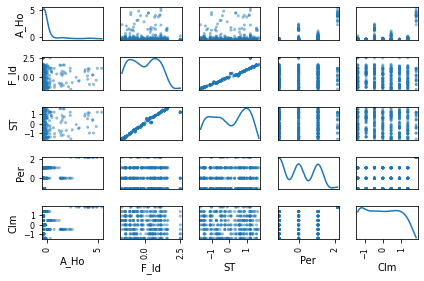

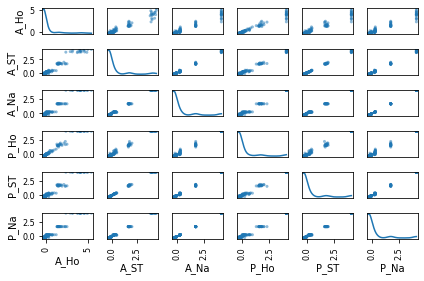

In [19]:
# In this step, the scatter matrix is plotted between the prediction column "Avg_Hosp" whose shortened name is "A_Ho"
# and each of the other remaining feature columns. For clarity of visualization, we create two scatter_matrix
# plots. The first one showing Avg_Hosp with the columns "Facility Id", "State", "Period" and "Claim Type".
# The second plot shows Avg_Hosp relation with the columns "Avg_State", "Avg_Nation", "Percent_Hosp", 
# "Percent_State" and "Percent_Nation"

%matplotlib inline

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


plt.figure(figsize=(11,8))
pd.plotting.scatter_matrix(standardised_table1_sample.loc[:, 'A_Ho':'Clm'], diagonal='kde')
plt.tight_layout()
plt.show()

pd.plotting.scatter_matrix(standardised_table1_sample.loc[:, ['A_Ho','A_ST','A_Na', \
                                                              'P_Ho','P_ST','P_Na']], diagonal='kde')
plt.tight_layout()
plt.show()

In [20]:
# In this step, we calculate the statistical scores of the feature columns as it relates to the prediction column
# Avg_Hosp using the SelectKBest library function based on the chi2 statistical test. The scores are displayed in a 
# tabluar format for visualization. The X data frame has all the feature columns. The y data frame has the
# prediction column.

import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

X = table1.iloc[:,1:10]
y = table1.iloc[:,0:1]

# We are selecting all the feature columns to see the scores for each feature column
selected = SelectKBest(score_func=chi2, k=9)
fit = selected.fit(X,y)
datascores = pd.DataFrame(fit.scores_)
datacolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([datacolumns,datascores],axis=1) 
featureScores.columns = ['Features','Score'] # naming the dataframe columns
print(featureScores.nlargest(9,'Score')) # print 9 best features

         Features         Score
0     Facility ID  9.760495e+08
4       Avg_State  7.996024e+08
5      Avg_Nation  7.950498e+08
1           State  8.320571e+04
6    Percent_Hosp  3.732397e+04
7   Percent_State  3.685061e+04
8  Percent_Nation  3.673161e+04
3      Claim Type  2.672140e+04
2          Period  1.624859e+04


In [21]:
# Calculate Correlation Matrix to see how the data is related

corrMatrix = table1.corr()
print(corrMatrix)

                Avg_Hosp   Facility ID         State        Period  \
Avg_Hosp        1.000000 -8.863661e-06 -2.051140e-04  4.912669e-01   
Facility ID    -0.000009  1.000000e+00  9.821420e-01 -7.250570e-16   
State          -0.000205  9.821420e-01  1.000000e+00 -7.941509e-16   
Period          0.491267 -7.250570e-16 -7.941509e-16  1.000000e+00   
Claim Type      0.329614  1.675355e-14  1.650797e-14  1.815683e-01   
Avg_State       0.978819  8.851031e-04  6.733522e-04  4.994380e-01   
Avg_Nation      0.976734 -1.315365e-15 -1.331209e-15  5.009157e-01   
Percent_Hosp    0.982630  1.653416e-07  1.680870e-07  5.003226e-01   
Percent_State   0.977278  1.628740e-06  1.705365e-06  4.995657e-01   
Percent_Nation  0.976734  1.502742e-15  1.561542e-15  5.009206e-01   

                  Claim Type  Avg_State    Avg_Nation  Percent_Hosp  \
Avg_Hosp        3.296143e-01   0.978819  9.767342e-01  9.826304e-01   
Facility ID     1.675355e-14   0.000885 -1.315365e-15  1.653416e-07   
State           

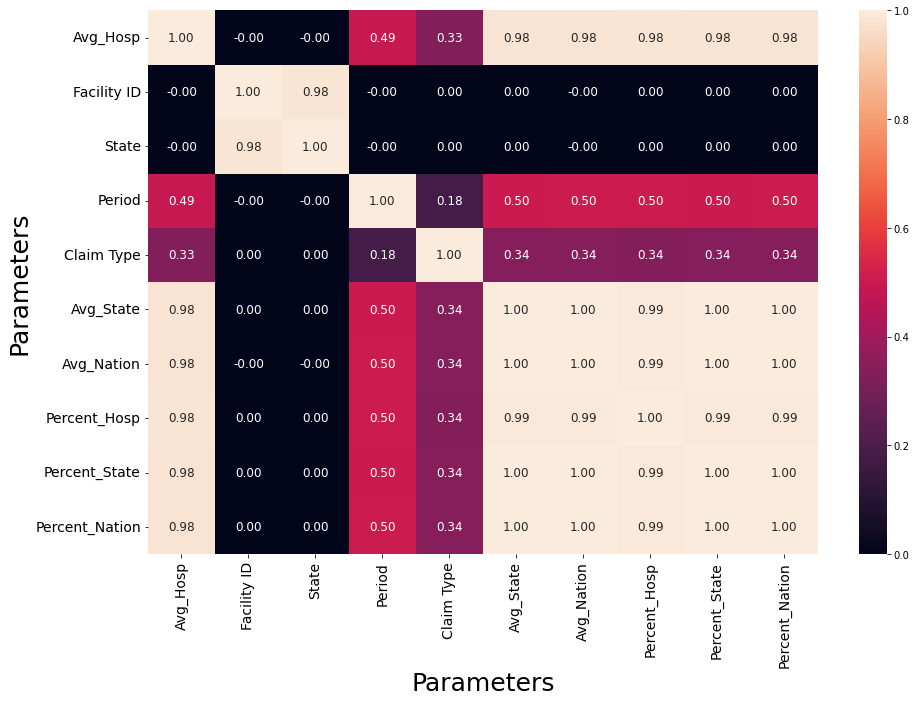

In [22]:
# Visualize Correlation matrix with Searborn and Matplotlib

import seaborn as sn
import matplotlib.pyplot as plt

plt.subplots(figsize=(15,10))
plt.tick_params(labelsize=14);
sn.heatmap(corrMatrix, annot=True, annot_kws={'size':12}, fmt='.2f', robust=True)
plt.xlabel('Parameters', fontsize=25)
plt.ylabel('Parameters', fontsize=25)
plt.show()

In [23]:
# Our target prediction is the column Avg_Hosp, we want to see 
# how this value is correlated with the other feature columns
# From the below matrix, we see that the prediction column Avg_Hosp has the highest correlation
# with the Avg_State feature column

corrMatrix['Avg_Hosp'].sort_values(ascending=False)

Avg_Hosp          1.000000
Percent_Hosp      0.982630
Avg_State         0.978819
Percent_State     0.977278
Avg_Nation        0.976734
Percent_Nation    0.976734
Period            0.491267
Claim Type        0.329614
Facility ID      -0.000009
State            -0.000205
Name: Avg_Hosp, dtype: float64

In [24]:
table1.head()

,Avg_Hosp,Facility ID,State,Period,Claim Type,Avg_State,Avg_Nation,Percent_Hosp,Percent_State,Percent_Nation
0,0.0,670102,43,1,2,1.0,1.0,0.0000,0.0000,0.0000
1,0.0,670102,43,1,3,7.0,7.0,0.0000,0.0003,0.0003
2,48.0,670102,43,1,4,140.0,152.0,0.0017,0.0060,0.0070
3,0.0,670102,43,1,5,3.0,2.0,0.0000,0.0001,0.0001
4,0.0,670102,43,1,6,8.0,8.0,0.0000,0.0003,0.0004


In [25]:
table1.drop(["Facility ID"], axis=1, inplace=True)

In [26]:
table1.head()

,Avg_Hosp,State,Period,Claim Type,Avg_State,Avg_Nation,Percent_Hosp,Percent_State,Percent_Nation
0,0.0,43,1,2,1.0,1.0,0.0000,0.0000,0.0000
1,0.0,43,1,3,7.0,7.0,0.0000,0.0003,0.0003
2,48.0,43,1,4,140.0,152.0,0.0017,0.0060,0.0070
3,0.0,43,1,5,3.0,2.0,0.0000,0.0001,0.0001
4,0.0,43,1,6,8.0,8.0,0.0000,0.0003,0.0004


In [27]:
bucket = "chadderw-30day-bucket"
prefix = "medicare"

In [28]:
table1.to_csv(f"s3://{bucket}/{prefix}/medicare.csv", index=False)

# Creating Train, Validation and Test Datasets:
In the last step of the previous section, we see that the prediction column `Avg_Hosp` cost has second highest correlation with the `Avg_State` feature column. In this section we examine the spread of values for the `Avg_State`. Then we use a technique called stratification to categorize each data row based on the category of the `Avg_State` cost. We did not use the column `Percent_Hosp` (highest correlation) for stratification because the `Percent_Hosp` column is derived from the `Avg_Hosp` value and the line which contains the Total Cost per Episode for a specific hospital. There is an obvious expected high degree of correlation between `Avg_Hosp` and `Percent_Hosp`. Using `Percent_Hosp` to stratify values will not give us a good representative sample for train, validation and test datasets.

From the defined categories of the `Avg_State` values, we use the StratifiedShuffleSplit function from the Scikit-Learn library to split and randomly select data subsets for the training, validation and test data sets. We use this method two times. First we split the original data into train and test. Then we split the test set again into validation and test set. This stratification technique allows us to have good representation of data in each of the train, validation and test sets that are well spread across the `Avg_State` value categories. Then we move the prediction column `Avg_Hosp` to the first column in each of the train, validation and test data sets. The data sets are uploaded into S3 bucket location during the machine learning model creation process.

<ipython-input-29-cef6568338b4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(table1.Avg_State)


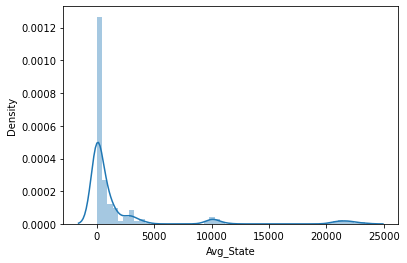

In [29]:
# We see the distribution of the data around the feature column "Avg_State" that has the highest
# correlation to the target prediction "Avg_Hosp"
# From the histogram below we see that most of the values are between 0 and 5000 for Avg_State

sn.distplot(table1.Avg_State)
plt.show()

In [30]:
# Before we divide this dataset into train, validation and test, we need to stratify the values of Avg_State
# to ensure we effectively select random sets of data into the train, validation and test data sets
# which is good representative sample based on the Avg_State values
# To do this, we introduce a new Feature column column called "Avg_State_Category", we make this column
# equal to the value of the respective Avg_State value divided by 1000 and then using the ceil (ceiling) function

table1['Avg_State_Category'] = np.ceil(table1['Avg_State']/1000)

In [31]:
# Now see how these categories are distributed by aggregating across all the data rows

table1.Avg_State_Category.value_counts().sort_index()

0.0     14226
1.0     35069
2.0      6325
3.0      3561
4.0      2007
5.0       472
10.0     1060
11.0     1749
12.0      274
20.0        9
21.0      750
22.0     1482
23.0      544
24.0      298
Name: Avg_State_Category, dtype: int64

In [32]:
# From the above distribution, we see approximately 61k out of the total 67k values have category 0.0 to 5.0
# Only about 6k values of the total (approx 9%) of the values have category greater than 5.0
# Hence we update the category to 6.0 for all data rows that have category greater than 5.0

table1['Avg_State_Category'].where(table1['Avg_State_Category'] < 5, 6.0, inplace=True)

In [33]:
table1.to_csv(f"s3://{bucket}/{prefix}/medicare.csv", index=False)

In [34]:
import boto3
import sagemaker

session = sagemaker.Session()
role = sagemaker.get_execution_role()
default_bucket = session.default_bucket()

print('Initialized SageMaker session with default bucket {}'.format(default_bucket))

Initialized SageMaker session with default bucket sagemaker-us-west-2-782067938675


In [35]:
from sagemaker.debugger import CollectionConfig, DebuggerHookConfig

debugger_prefix="medicare_debugger"

hook_config = DebuggerHookConfig(
   s3_output_path=f's3://{default_bucket}/{debugger_prefix}',
   collection_configs=[
       CollectionConfig(name="all")
   ]
)

In [36]:
from sagemaker.pytorch import PyTorch

s3_output_path = 's3://{}/{}'.format(default_bucket, prefix)
print('Training artifacts will output to {}'.format(s3_output_path))

estimator = PyTorch(source_dir='source',
                    entry_point='train.py',
                    framework_version='1.13.1',
                    py_version="py39",
                    sagemaker_session=session,
                    role=role,
                    train_instance_count=1,
                    train_instance_type='ml.m4.xlarge',
                    output_path=s3_output_path,
                    debugger_hook_config=hook_config,
                    enable_default_profiling=True,
                    keep_alive_period_in_seconds=600,
                    hyperparameters={
                        'input_dim': 8,
                        'output_dim': 1,
                        'batch_size':128,
                        'epochs': 200,
                        'lr':0.01
                    })

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Training artifacts will output to s3://sagemaker-us-west-2-782067938675/medicare


In [37]:
%%time
estimator.fit({'train': f"s3://{bucket}/{prefix}/medicare.csv"})

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-03-30-13-13-14-762


2023-03-30 13:13:15 Starting - Starting the training job...
2023-03-30 13:13:39 Starting - Preparing the instances for training......
2023-03-30 13:14:49 Downloading - Downloading input data......
2023-03-30 13:15:29 Training - Downloading the training image......
2023-03-30 13:16:30 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-03-30 13:16:45,688 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-03-30 13:16:45,690 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-03-30 13:16:45,692 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2023-03-30 13:16:45,705 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-03-30 13:16:45,707 sagemaker_pytorch_container.training INFO     Invoking user trai

In [38]:
%%time
from sagemaker.pytorch import PyTorchModel
from sagemaker.model_monitor import DataCaptureConfig
s3_capture_upload_path=f"s3://{default_bucket}/model_monitor_data/"

# Create a model from the trained estimator data, basically transferring trained parameters.
model = PyTorchModel(source_dir='source',
                     entry_point='predict.py',
                     framework_version='1.13.1',
                     py_version='py39',
                     model_data=estimator.model_data,
                     role=role
                    ) 

predictor = model.deploy(initial_instance_count=1,
                         instance_type='ml.m4.xlarge',
                         data_capture_config=DataCaptureConfig(
                             enable_capture=True, sampling_percentage=100, destination_s3_uri=s3_capture_upload_path
                         )
                        )

INFO:sagemaker:Creating model with name: pytorch-inference-2023-03-30-13-19-22-718
INFO:sagemaker:Creating endpoint-config with name pytorch-inference-2023-03-30-13-19-23-473
INFO:sagemaker:Creating endpoint with name pytorch-inference-2023-03-30-13-19-23-473


------!CPU times: user 1.12 s, sys: 59.7 ms, total: 1.18 s
Wall time: 3min 34s


In [39]:
!aws s3 cp s3://chadderw-30day-bucket/medicare/medicare.csv .

download: s3://chadderw-30day-bucket/medicare/medicare.csv to ./medicare.csv


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("medicare.csv")
df_arr = df.to_numpy()

X_train, X_val, y_train, y_val = train_test_split(df_arr[:, 1:9], df_arr[:, 0:1], test_size=0.2, stratify=df_arr[:, 9:10])

In [41]:
type(X_val)

numpy.ndarray

In [42]:
preds = predictor.predict(X_val)

In [44]:
s3_client = boto3.Session().client("s3")
result = s3_client.list_objects(Bucket=default_bucket, Prefix="model_monitor_data")
capture_files = [capture_file.get("Key") for capture_file in result.get("Contents")]
print("Found Capture Files:")
print("\n ".join(capture_files))

TypeError: 'NoneType' object is not iterable

In [ ]:
def get_obj_body(obj_key):
    return s3_client.get_object(Bucket=bucket, Key=obj_key).get("Body").read().decode("utf-8")


capture_file = get_obj_body(capture_files[-1])
print(capture_file[:2000])